In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from package_global_functions import *

In [2]:
# https://stackoverflow.com/questions/23528477/share-axes-in-matplotlib-for-only-part-of-the-subplots

def set_share_axes(axs, target=None, sharex=False, sharey=False):
    if target is None:
        target = axs.flat[0]
    # Manage share using grouper objects
    for ax in axs.flat:
        if sharex:
            target._shared_axes['x'].join(target, ax)
        if sharey:
            target._shared_axes['y'].join(target, ax)
    # Turn off x tick labels and offset text for all but the bottom row
    if sharex and axs.ndim > 1:
        for ax in axs[:-1,:].flat:
            ax.xaxis.set_tick_params(which='both', labelbottom=False, labeltop=False)
            ax.xaxis.offsetText.set_visible(False)
    # Turn off y tick labels and offset text for all but the left most column
    if sharey and axs.ndim > 1:
        for ax in axs[:,1:].flat:
            ax.yaxis.set_tick_params(which='both', labelleft=False, labelright=False)
            ax.yaxis.offsetText.set_visible(False)

latexFont(ticklabelssize=12,labelsize=14) # ticklabelssize=10, labelsize=12, legendsize=8

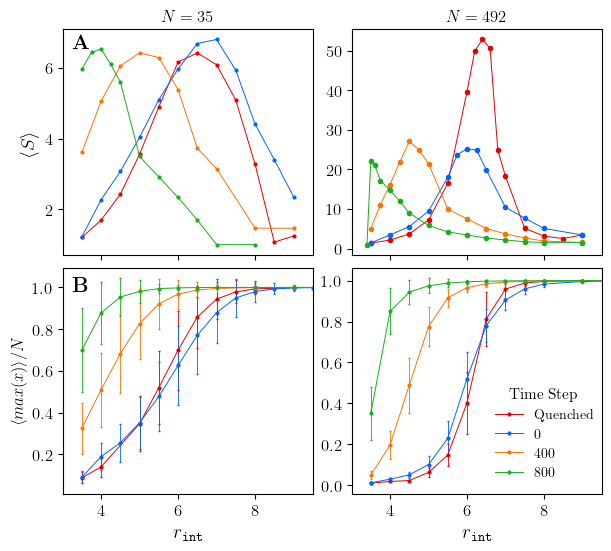

In [8]:
fig, ax = plt.subplots(2,2, constrained_layout=True, figsize=(6.0, 5.4), sharex=True)
loops_l = [0, 400, 800]
loops_colors = ['xkcd:bright blue', 'xkcd:orange', 'xkcd:green']
linewidth = 0.7
elinewidth = 0.6
markersize=4.0
max_ir_mcs = 8.0
avgGc_w_ebars = True

ax[0,0].set_xlim(3.0,8.5)
ax[0,1].set_xlim(3.0,8.5)
# ax[1,0].set_xlim(3.0,8.5)
# ax[1,1].set_xlim(3.0,8.5)

max_ir_mcs = 9.0
ax[0,0].set_xlim(3.0,9.5)
ax[0,1].set_xlim(3.0,9.5)
ax[1,0].set_xlim(3.0,9.5)
ax[1,1].set_xlim(3.0,9.5)

ax[0,0].set_ylabel(r'$\langle S \rangle$')
# ax[1,0].set_ylabel('Average Giant Component', fontsize=12)
ax[1,0].set_ylabel(r'$\langle max(x) \rangle / N$', fontsize=12)

# ax[0,0].set_xlabel(r'$r_{\tt int}$')
# ax[0,1].set_xlabel(r'$r_{\tt int}$')
ax[1,0].set_xlabel(r'$r_{\tt int}$')
ax[1,1].set_xlabel(r'$r_{\tt int}$')

ax[0,0].set_title(r'$N = 35$', fontsize=12)
ax[0,1].set_title(r'$N = 492$', fontsize=12)

# mean cluster size N=35
N, ar, er = 35, 20.0, 1.5
df = pd.read_csv(f'{getExternalSSDpath()}/quenched_configs/{N}_bots/processed_data/meanClusterSize_nopush_N_{N}_ar_{ar}_er_{er}.csv')
df = df[df.interac_r.isin(np.arange(3.5,10.5,0.5))] # clean some points out
df = df.query('interac_r <= @max_ir_mcs')
ax[0,0].plot(df['interac_r'], df['mcs'], color='xkcd:red', marker='.', label='Quenched', lw=linewidth, ms=markersize)
for loops,c in zip(loops_l, loops_colors):
    df = pd.read_csv(f'{getExternalSSDpath()}/kilombo_configs/processed_data/meanClusterSize_N_{N}_ar_{ar-er}_ir_loops_{loops}.csv')
    df = df.query('interac_r <= @max_ir_mcs')
    ax[0,0].plot(df['interac_r'], df['mcs'], color=c, marker='.', label=f'{loops}', lw=linewidth, ms=markersize)


# average giant component N=35
jitter = [-0.1, -0.033, 0.033, 0.1]
jitter = [0.0, 0.0, 0.0, 0.0]
df = pd.read_csv(f'{getExternalSSDpath()}/quenched_configs/{N}_bots/processed_data/avgGiantComp_nopush_N_{N}_ar_{ar}_er_{er}.csv')
df = df[df.interac_r.isin(np.arange(3.5,10.5,0.5))] # clean some points out
df = df.query('interac_r <= @max_ir_mcs')
if avgGc_w_ebars:
    jit = jitter[0]
    ax[1,0].errorbar(df['interac_r']+jit, df['avg']/N, df['std']/N, color='xkcd:red', marker='.', lw=linewidth, ms=markersize, capsize=1.0, elinewidth=elinewidth)
else:
    ax[1,0].plot(df['interac_r'], df['avg']/N, color='xkcd:red', marker='.', lw=linewidth)
for loops,c,jit in zip(loops_l, loops_colors,jitter[1:]):
    df = pd.read_csv(f'{getExternalSSDpath()}/kilombo_configs/processed_data/avgGiantComp_{N}_ar_{ar-er}_ir_loops_{loops}.csv')
    df = df[df.interac_r.isin(np.arange(3.5,10.5,0.5))]
    if avgGc_w_ebars:
        ax[1,0].errorbar(df['interac_r']+jit, df['avg']/N, df['std']/N, color=c, marker='.', lw=linewidth, ms=markersize, capsize=1.0, elinewidth=elinewidth)
    else:
        ax[1,0].plot(df['interac_r'], df['avg']/N, color=c, marker='.', label=f'{loops}', lw=linewidth, ms=markersize)


# mean cluster size N=492
N, ar, er = 492, 75.0, 1.5
df = pd.read_csv(f'{getExternalSSDpath()}/quenched_configs/{N}_bots/processed_data/meanClusterSize_nopush_N_{N}_ar_{ar}_er_{er}.csv')
df = df.query('interac_r <= @max_ir_mcs')
df = df[~df.interac_r.isin([3.8, 4.3, 4.6, 4.9,5.2,5.8,6.1,6.3,6.5,6.7,6.9,7.3,7.6,7.9,8.2,8.8])]
ax[0,1].plot(df['interac_r'], df['mcs'], color='xkcd:red', marker='.', lw=linewidth)
for loops,c in zip(loops_l, loops_colors):
    df = pd.read_csv(f'{getExternalSSDpath()}/kilombo_configs/processed_data/meanClusterSize_N_{N}_ar_{ar-er}_ir_loops_{loops}.csv')
    df = df.query('interac_r <= @max_ir_mcs')
    ax[0,1].plot(df['interac_r'], df['mcs'], color=c, marker='.', lw=linewidth)


# average giant component N=492
jitter = [-0.1, -0.033, 0.033, 0.1]
jitter = [0.0, 0.0, 0.0, 0.0]
df = pd.read_csv(f'{getExternalSSDpath()}/quenched_configs/{N}_bots/processed_data/avgGiantComp_nopush_N_{N}_ar_{ar}_er_{er}.csv')
df = df[df.interac_r.isin(np.arange(3.5,10.5,0.5))] # clean some points out
df = df.query('interac_r <= @max_ir_mcs')
if avgGc_w_ebars:
    jit = jitter[0]
    ax[1,1].errorbar(df['interac_r']+jit, df['avg']/N, df['std']/N, color='xkcd:red', marker='.', lw=linewidth, ms=markersize, capsize=1.0, elinewidth=elinewidth)
else:
    ax[1,1].plot(df['interac_r'], df['avg']/N, color='xkcd:red', marker='.', lw=linewidth)
for loops,c,jit in zip(loops_l, loops_colors,jitter[1:]):
    df = pd.read_csv(f'{getExternalSSDpath()}/kilombo_configs/processed_data/avgGiantComp_{N}_ar_{ar-er}_ir_loops_{loops}.csv')
    df = df[df.interac_r.isin(np.arange(3.5,10.5,0.5))]
    if avgGc_w_ebars:
        ax[1,1].errorbar(df['interac_r']+jit, df['avg']/N, df['std']/N, color=c, marker='.', lw=linewidth, ms=markersize, capsize=1.0, elinewidth=elinewidth)
    else:
        ax[1,1].plot(df['interac_r'], df['avg']/N, color=c, marker='.', label=f'{loops}', lw=linewidth, ms=markersize)


fig.legend(loc=(0.8, 0.12), fontsize=10, frameon=False, title='Time Step', title_fontsize=11)
fig.text(0.11, 0.92, r'$\textbf{A}$')
fig.text(0.11, 0.47, r'$\textbf{B}$')
fig.savefig('figure5_mcs_avgGc.pdf')

In [18]:
df = pd.read_csv(f'{getExternalSSDpath()}/quenched_configs/492_bots/processed_data/meanClusterSize_nopush_N_492_ar_75.0_er_1.5.csv')
# df = pd.read_csv(f'{getExternalSSDpath()}/quenched_configs/492_bots/processed_data/avgGiantComp_nopush_N_492_ar_75.0_er_1.5.csv')
# df = pd.read_csv(f'{getExternalSSDpath()}/kilombo_configs/processed_data/avgGiantComp_492_ar_73.5_ir_loops_0.csv')

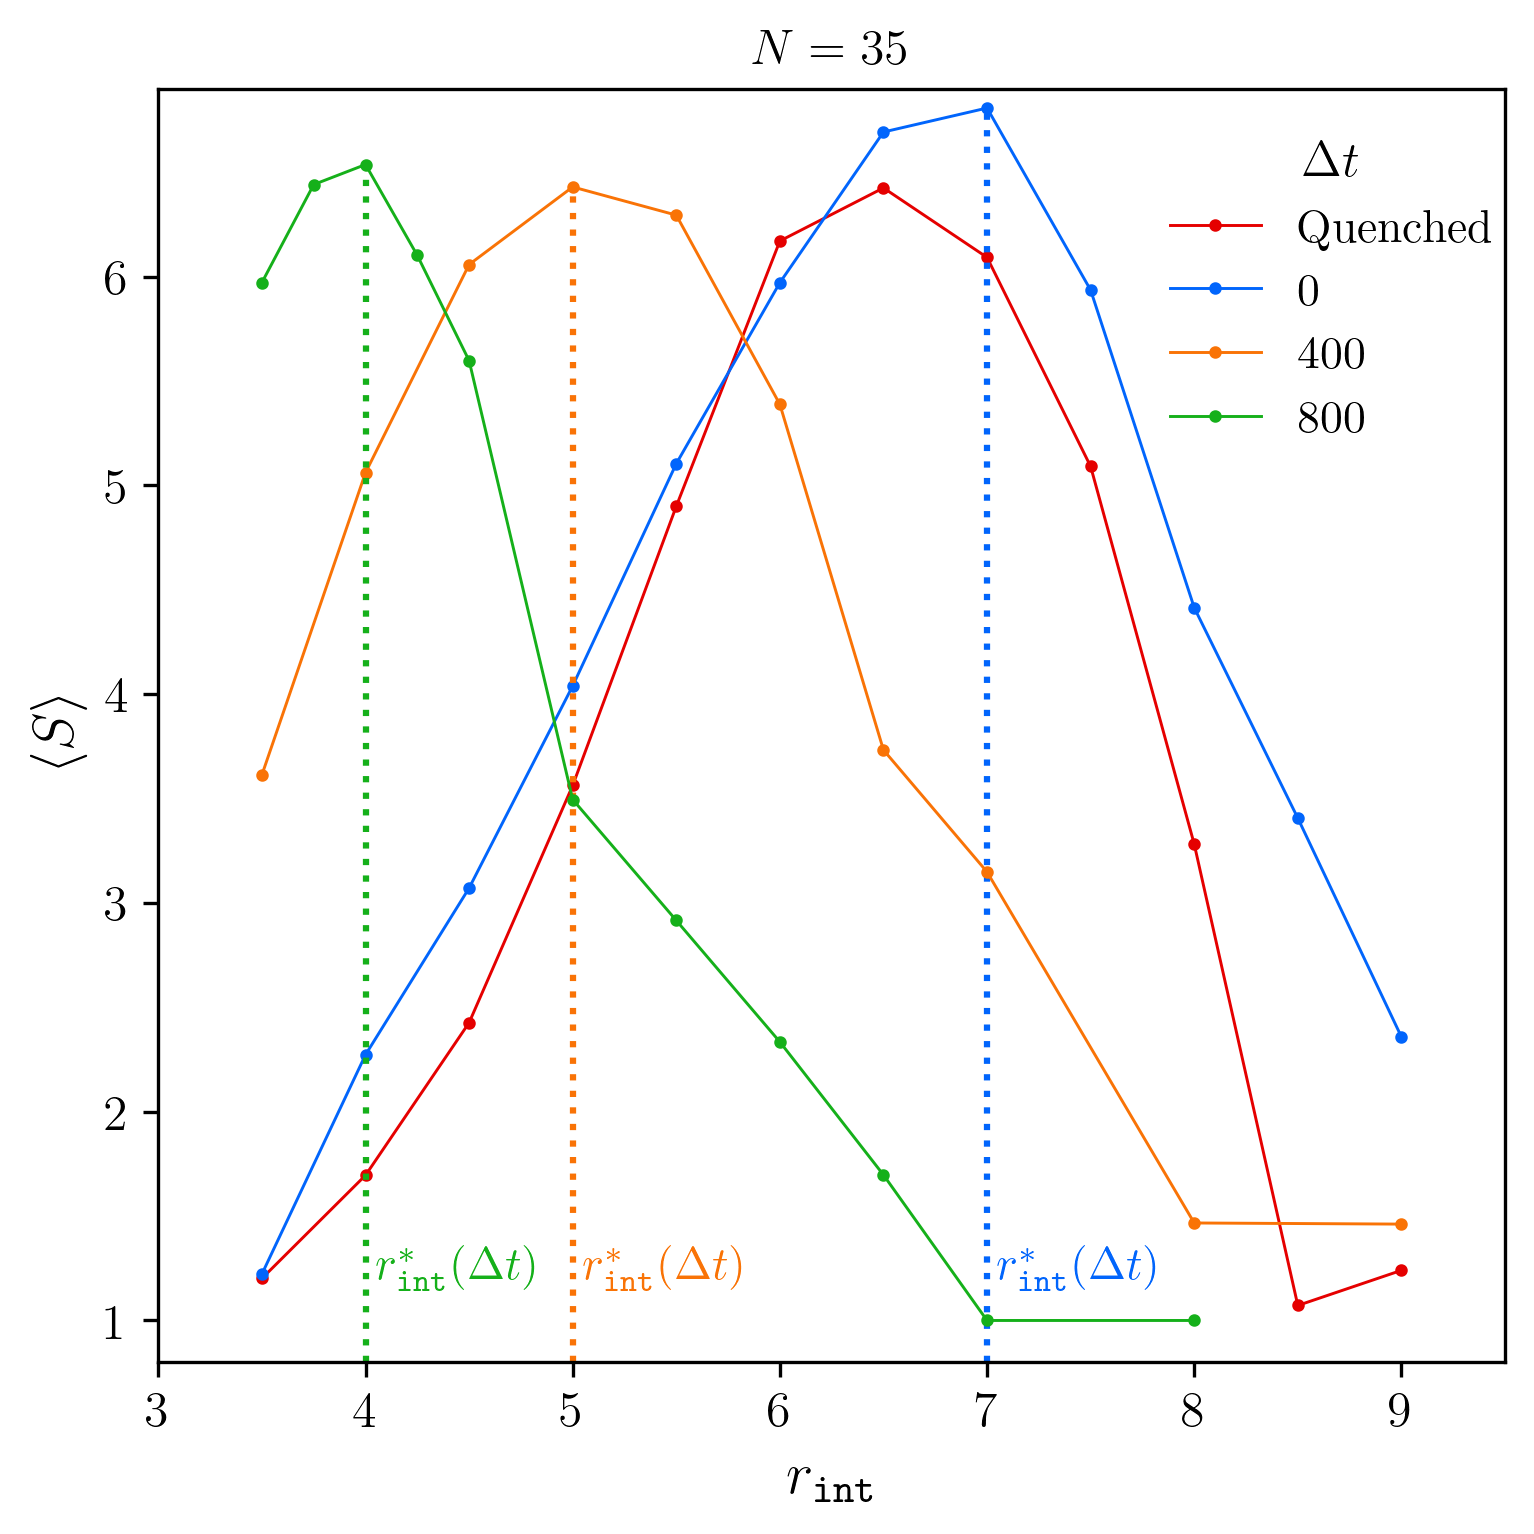

In [3]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5, 5), dpi=300.0)
latexFont(ticklabelssize=14,labelsize=16)

loops_l = [0, 400, 800]
loops_colors = ['xkcd:bright blue', 'xkcd:orange', 'xkcd:green']
linewidth = 0.7
markersize=4.0
max_ir_mcs = 8.0

max_ir_mcs = 9.0
ax.set_xlim(3.0,9.5)
ax.set_ylim(0.8,6.9)
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_xlabel(r'$r_{\tt int}$')
ax.set_title(r'$N = 35$', fontsize=12)

# mean cluster size N=35
N, ar, er = 35, 20.0, 1.5
df = pd.read_csv(f'{getExternalSSDpath()}/quenched_configs/{N}_bots/processed_data/meanClusterSize_nopush_N_{N}_ar_{ar}_er_{er}.csv')
df = df[df.interac_r.isin(np.arange(3.5,10.5,0.5))] # clean some points out
df = df.query('interac_r <= @max_ir_mcs')
ax.plot(df['interac_r'], df['mcs'], color='xkcd:red', marker='.', label='Quenched', lw=linewidth, ms=markersize)
for loops,c in zip(loops_l, loops_colors):
    df = pd.read_csv(f'{getExternalSSDpath()}/kilombo_configs/processed_data/meanClusterSize_N_{N}_ar_{ar-er}_ir_loops_{loops}.csv')
    df = df.query('interac_r <= @max_ir_mcs')
    ax.plot(df['interac_r'], df['mcs'], color=c, marker='.', label=f'{loops}', lw=linewidth, ms=markersize)
    maxMCS = max(df['mcs'])
    i = df[df.mcs == maxMCS].index[0]
    rint = df.interac_r.iloc[i]
    ax.vlines(rint, ymin=0.8, ymax=maxMCS, color=c, ls=':')
    ax.text(rint+0.05, 1.2, r'$r_{\tt int}^*(\Delta t)$', color=c, fontsize=11)

fig.legend(title='$\Delta t$', fontsize=11, frameon=False, title_fontsize=12, loc=(0.75, 0.7))
fig.savefig('meanClusterSize_for_poster.png')